# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.


In [3]:
! git clone https://github.com/DS3001/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 42 (delta 6), reused 2 (delta 2), pack-reused 31
Receiving objects: 100% (42/42), 2.49 MiB | 8.56 MiB/s, done.
Resolving deltas: 100% (8/8), done.


                  Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0  


<Axes: xlabel='Price', ylabel='Density'>

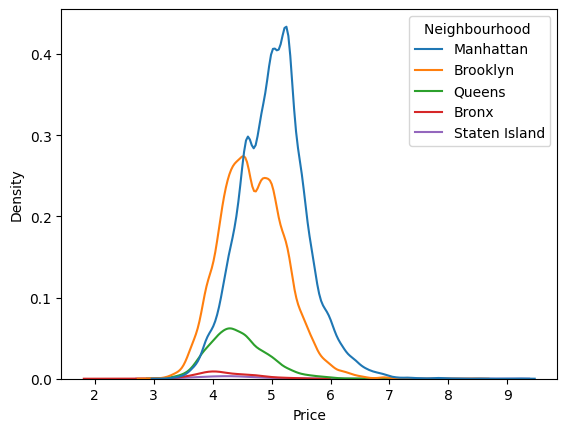

In [ ]:
import pandas as pd

df = pd.read_csv("/content/linearRegression/data/Q1_clean.csv")
# df.head()

df_price_n_neighbourhood = df.loc[:, ["Price", "Neighbourhood "]]
print(df_price_n_neighbourhood.groupby("Neighbourhood ").describe())

# Manhattan is the most expensive on average with around $184/night.
# Manhattan also has the highest 25th, 50th, and 75th percentile and highest max

import seaborn as sns
import numpy as np

# taking the log because initial kernel density was scewed and hard to read
sns.kdeplot(x=np.log(df_price_n_neighbourhood["Price"]), hue=df_price_n_neighbourhood["Neighbourhood "])

2. Regress price on Neighbourhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [ ]:
output = df["Price"]
input = pd.get_dummies(df["Neighbourhood "], dtype="int")

from sklearn import linear_model

regression = linear_model.LinearRegression(fit_intercept=False).fit(input, output)
results = pd.DataFrame({"Neighbourhood": regression.feature_names_in_, "Coefficients": regression.coef_})
print(results)

# The coefficients are the same as the averages from Q1
# Since there are no other variables, the regression is just using the averages from the Price across Neighbourhoods

   Neighbourhood  Coefficients
0          Bronx     75.276498
1       Brooklyn    127.747378
2      Manhattan    183.664286
3         Queens     96.857233
4  Staten Island    146.166667


3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [ ]:
output = df["Price"]
input = pd.get_dummies(df["Neighbourhood "], dtype ="int", drop_first=True)

from sklearn import linear_model

regression = linear_model.LinearRegression().fit(input, output)
results = pd.DataFrame({"Neighbourhood": regression.feature_names_in_, "Coefficients": regression.coef_})
print(results)
print(regression.intercept_)

# Had to drop the Bronx from dummies or else the coefficients were huge and negative
# The Bronx is now the intercept and all other coefficients are dependent on it i.e.
#   to get the original coefficients add the intercept from the Bronx


   Neighbourhood  Coefficients
0       Brooklyn     52.470881
1      Manhattan    108.387789
2         Queens     21.580735
3  Staten Island     70.890169
75.27649769585331


4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?


In [ ]:
from sklearn.model_selection import train_test_split

output = df["Price"]
input = df.loc[:,["Review Scores Rating", "Neighbourhood "]]

X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2)

# from solutions, need to make dummies for "Neighbourhood "
Z_train = pd.concat([X_train["Review Scores Rating"], pd.get_dummies(X_train["Neighbourhood "], dtype="int")], axis = 1)
Z_test = pd.concat([X_test["Review Scores Rating"], pd.get_dummies(X_test["Neighbourhood "], dtype="int")], axis = 1)

regression = linear_model.LinearRegression(fit_intercept=False).fit(Z_train, y_train)

results = pd.DataFrame({"Neighbourhood": regression.feature_names_in_, "Coefficients": regression.coef_})
print(results)  # looks good
print()

y_hat = regression.predict(Z_test)
print("R^2 =", regression.score(Z_test,y_test))
# R^2 = 0.0637
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print("RMSE =", rmse)
# RMSE = 120.1439

coefficient = results["Coefficients"].iloc[0]
most_expensive_coefficient = results["Coefficients"].max()
perfect_rating = 100
most_expensive_property = most_expensive_coefficient + coefficient * perfect_rating
print(most_expensive_property)
# most expensive is roughly 193.5 from Manhattan

          Neighbourhood  Coefficients
0  Review Scores Rating      1.050953
1                 Bronx    -23.539044
2              Brooklyn     31.180167
3             Manhattan     88.362856
4                Queens      0.149654
5         Staten Island     62.746422

R^2 = 0.06374387200881759
RMSE = 120.14386916632779
1.0509533949971266
193.45819561184135


5. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood and Property Type. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [ ]:
output = df["Price"]
input = df.loc[:,["Review Scores Rating", "Neighbourhood ", "Room Type"]]

X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2)

# from solutions, need to make dummies for "Neighbourhood "
Z_train = pd.concat(
    [X_train["Review Scores Rating"],
     pd.get_dummies(X_train["Neighbourhood "], dtype="int"),
     pd.get_dummies(X_train["Room Type"], dtype="int") ],
    axis = 1)
Z_test = pd.concat(
    [X_test["Review Scores Rating"],
     pd.get_dummies(X_test["Neighbourhood "], dtype="int"),
     pd.get_dummies(X_test["Room Type"], dtype="int") ],
    axis = 1)

regression = linear_model.LinearRegression(fit_intercept=False).fit(Z_train, y_train)

results = pd.DataFrame({"Neighbourhood": regression.feature_names_in_, "Coefficients": regression.coef_})
print(results)
print()

y_hat = regression.predict(Z_test)
print("R^2 =", regression.score(Z_test,y_test))
# R^2 = 0.1128
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print("RMSE =", rmse)
# RMSE = 178.1819


          Neighbourhood  Coefficients
0  Review Scores Rating      0.594287
1                 Bronx    -11.393257
2              Brooklyn     12.392165
3             Manhattan     53.790003
4                Queens     -5.112099
5         Staten Island     51.224155
6       Entire home/apt    112.099271
7          Private room      5.655292
8           Shared room    -16.853598

R^2 = 0.11284697980085767
RMSE = 178.18185820023885


most expensive = 100 * 0.0594287 + 112.099271 + 53.790003 =roughly= 172, so most expensive is 172/night in manhattan and an entire home/apt

6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

In part 4 we didn't have room types to regress on, and so the coefficients were more powerful and determining. In part 5, we added room types, which helped explain the data more and took away some of the coefficients "determining power" (for lack of a better phrase), which changes how heavily weighted each coeffcient for neighbourhood was and put more into what type of property each was. The prediction relies on more variables and as such, each variable counts for a bit of the total, so more variabels --> less heavy weights.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [32]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/linearRegression/data/cars_hw.csv")
# df.head()
df = df.drop("Unnamed: 0", axis=1)
df_old = df  # grabbing for Q2

# make new vars and drop old ones
df["Transformed Price"] = np.arcsinh(df["Price"])
df["Transformed Mileage"] = np.arcsinh(df["Mileage_Run"])
df["Transformed Age"] = max(df['Make_Year'])-df['Make_Year']
df = df.drop(["Price", "Mileage_Run", "Make_Year"], axis=1)

# checking for bad values now
for column in df.columns:
  print(column)
  print(df[column].unique())
  print()
# looks pretty good

Make
['Volkswagen' 'Hyundai' 'Honda' 'Renault' 'Tata' 'Chevrolet'
 'Maruti Suzuki' 'Toyota' 'Mahindra' 'Ford' 'Nissan' 'Jeep' 'MG Motors'
 'Kia' 'Skoda' 'Datsun']

Color
['silver' 'red' 'white' 'bronze' 'orange' 'grey' 'blue' 'yellow' 'beige'
 'brown' 'golden' 'black' 'maroon' 'purple' 'green']

Body_Type
['sedan' 'crossover' 'suv' 'hatchback' 'muv']

No_of_Owners
['1st' '2nd' '3rd']

Seating_Capacity
[5 7 8 6 4]

Fuel_Type
['diesel' 'petrol' 'petrol+cng']

Transmission
['7-Speed' '5-Speed' '6-Speed' 'CVT' '4-Speed']

Transmission_Type
['Automatic' 'Manual']

Transformed Price
[14.08858648 14.12593212 14.27672568 13.62676843 13.84506936 14.00447666
 13.35664467 14.85861014 14.16616743 13.5721643  14.0192674  13.99449321
 14.47716707 15.25059508 14.10219213 14.54691645 14.35550656 14.35783485
 14.12299526 14.03865411 13.94126176 13.51710452 14.5819082  13.97592728
 13.58231667 13.91806715 14.49252836 13.82941346 13.97422225 14.06080691
 13.0689626  13.88503662 13.72339527 14.61031139 13

2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

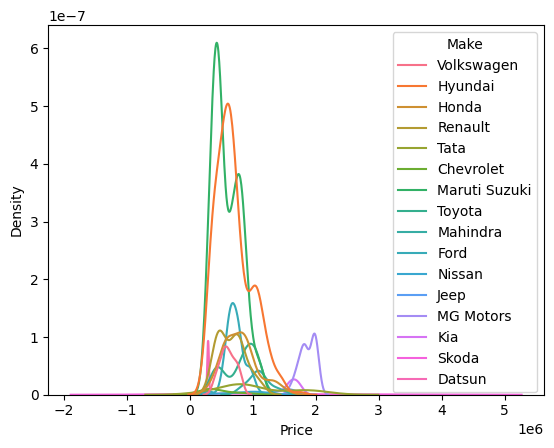

Price                                                    \
               count          mean           std        min        25%   
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault         68.0  6.625735e+05  2.148273e+05   287000.0   475000.0   
Skoda            5.0  1.136000e+06  1.070175e+06   436000.0   466000.0   
Tata            23.0  1.055217e+06  5.578305e+05   188000.0   779500.0   
Toyota          50.0  8.003400e+05  2.466900e+05   368000.0   526250.0   
Volkswagen      29.0  6.058276e+05  1.198312e+05   402000.0   542000.0   

                                                
                     50%        75%        max  
Make                                            
Chevrolet       345500.0   537500.0   892000.0  
Datsun          290000.0   295000.0   300000.0  
Ford            707500.0   787000.0  1066000.0  
Honda           785000.0   915000.0  1537000.0  
Hyundai         638000.0   837000.0  1742000.0  
Jeep           1529500.0  1581500.0  1649000.0  
Kia            1628500.0  1705750.0  1741000.0  
MG Motors      1848000.0  1978000.0  2019000.0  
Mahindra       1094500.0  1157000.0  1465000.0  
Maruti Suzuki   527000.0   764000.0  1163000.0  
Nissan          978000.0  1079750.0  1106000.0  
Renault         644000.0   801000.0  1164000.0  
Skoda           538000.0  1299000.0  2941000.0  
Tata            869000.0  1552000.0  2100000.0  
Toyota          894000.0  1023000.0  1092000.0  
Volkswagen      607000.0   699000.0   790000.0

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df_old, x="Price", hue="Make")
plt.show()

df_price_n_make = df_old.loc[:, ["Price", "Make"]]
df_price_n_make.groupby("Make").describe()

# MG Motors, Kia, and Jeep are the most expensive on average (in that order).
# Most appear to be clustered within 0e6 and 1.5e6, with some outliers going on
# both ends.

3. Split the data into an 80% training set and a 20% testing set.

In [34]:
# shuffling from solution
N = df.shape[0]
df = df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)
df.head()
# seems to have shuffled

output = df["Transformed Price"]
input = df.drop("Transformed Price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2)

4. Make a model where you regress price on the numeric variables alone; what is the  𝑅2  and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the  𝑅2  and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  𝑅2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [35]:
### Numerics
numerics = ["Transformed Mileage", "Transformed Age", "Seating_Capacity"]

X_train_numerics = X_train.loc[:,numerics]
X_test_numerics = X_test.loc[:,numerics]

numerics_regression = linear_model.LinearRegression().fit(X_train_numerics, y_train)

results = pd.DataFrame({"Variable": numerics_regression.feature_names_in_, "Coefficients": numerics_regression.coef_})
# print(results)
# print()

y_hat = numerics_regression.predict(X_test_numerics)
print("R^2 for numeric vars =", numerics_regression.score(X_test_numerics,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print("RMSE for numeric vars =", rmse)


### Categorical
categorical = ["Make", "Color", "Body_Type", "Fuel_Type", "Transmission", "Transmission_Type"]

# from solutions to build categorical dataframe
dummies = pd.DataFrame([])
for var in categorical:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train_cats = dummies.iloc[0:train_size,:]
    X_test_cats = dummies.iloc[train_size:,:]

# print(X_train_cats.head())
# looks fairly good

categorical_regression = linear_model.LinearRegression().fit(X_train_cats,y_train)

y_hat = categorical_regression.predict(X_test_cats)
print("R^2 for categorical vars =", categorical_regression.score(X_test_cats,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print("RMSE for categorical vars =", rmse)

# the numeric model seems to have a better R^2 RMSE

### both
# print()
# print()
# print("Checking X_train_numerics, X_train_cats, and X_train_both...")
# print()
# print("X_train_numerics...")
# print(X_train_numerics.head())
# print()
# print("X_train_cats...")
# print(X_train_cats.head())

X_train_numerics = X_train_numerics.reset_index()
X_test_numerics = X_test_numerics.reset_index()
X_train_cats = X_train_cats.reset_index()
X_test_cats = X_test_cats.reset_index()

## need to drop rows 0 and 4 cause they are indices

# print("X_train_numerics...")
# print(X_train_numerics.head())
# print()
# print("X_train_cats...")
# print(X_train_cats.head())

X_train_both = pd.concat([X_train_numerics, X_train_cats], axis=1, ignore_index=True)
X_test_both = pd.concat([X_test_numerics, X_test_cats], axis=1, ignore_index=True)

X_train_both = X_train_both.drop(0, axis=1).drop(4, axis=1)
X_test_both = X_test_both.drop(0, axis=1).drop(4, axis=1)
# print(X_train_both.head())  # prints NaNs

both_regression = linear_model.LinearRegression().fit(X_train_both, y_train)

y_hat = both_regression.predict(X_test_both)
print("R^2 for both =", both_regression.score(X_test_both, y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print("RMSE for both =", rmse)


R^2 for numeric vars = 0.3867975898808915
RMSE for numeric vars = 0.31574036982660264
R^2 for categorical vars = -0.0662454344538912
RMSE for categorical vars = 0.4163482840133754
R^2 for both = 0.37475543463060257
RMSE for both = 0.31882557346839513


5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the  𝑅2  and RMSE change? At what point does  𝑅2  go negative on the test set? For your best model with expanded features, what is the  𝑅2  and RMSE? How does it compare to your best model from part 4?

In [36]:
from sklearn.preprocessing import PolynomialFeatures

# from solutions- got a little lost
for d in np.arange(1,5):
    print("for d = ", d)
    expander = PolynomialFeatures(degree=d,include_bias=False)
    Z = expander.fit_transform(X_test_numerics)
    names = expander.get_feature_names_out() # Get the names of these variables
    X_test_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    Z = expander.fit_transform(X_train_numerics)
    names = expander.get_feature_names_out() # Get the names of these variables
    X_train_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_cats.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_cats], axis=1, ignore_index=True)
    #
    # Reset indices for concatenating:
    X_test_d.reset_index(drop=True, inplace=True)
    X_test_cats.reset_index(drop=True, inplace=True)
    X_test_both = pd.concat([X_test_d, X_test_cats], axis=1, ignore_index=True)


    both_regression = linear_model.LinearRegression().fit(X_train_all,y_train)

    y_hat = both_regression.predict(X_test_both)
    print("R^2 for both =", both_regression.score(X_test_both, y_test))
    rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
    print("RMSE for both =", rmse)

# When d is 2, it seems to be the best.
# As the degree of expansion increases, R^2 rapidly goes negative and RMSE grows
# rapidly as well. R^2 goes negative when d = 4.
# My best model with d = 2 and RMSE = 0.316 and R^2 = 0.387. My best model from
# part 4 had a R^2 of 0.387 and a RMSE of 0.316, so they are very very similar.

for d =  1
R^2 for both = 0.37342756437369506
RMSE for both = 0.31916394862556335
for d =  2
R^2 for both = 0.38712848181254134
RMSE for both = 0.3156551695427381
for d =  3
R^2 for both = 0.26455695051517947
RMSE for both = 0.3457822617702642
for d =  4
R^2 for both = -48760.473902754806
RMSE for both = 89.03619644137444


6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

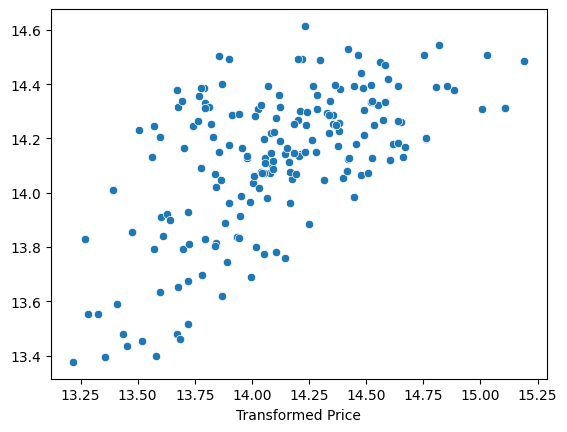

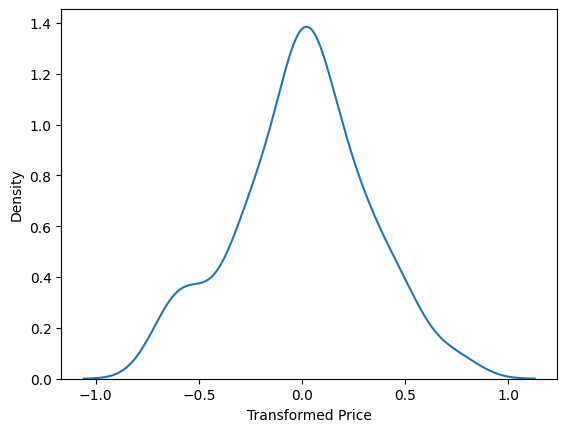

In [38]:
import matplotlib.pyplot as plt

### doing numerics cause it performed best (equally to d = 2 for all vars)
numerics_regression = linear_model.LinearRegression().fit(X_train_numerics, y_train)
y_hat_numerics = numerics_regression.predict(X_test_numerics)
residuals = y_test - y_hat_numerics

sns.scatterplot(x=y_test,y=y_hat_numerics)
plt.show()

### somewhat along the slope but not great
# there probably exists a better linear regression model and maybe my seed was
# bad for the split, which lead to my combined variables linear regression not
# performing well, and so this actually isn't the best but was the best from my
# personal results

sns.kdeplot(residuals)
plt.show()

### fairly unimodal and bell shaped around the center, a little bit of a sharper
# spike in the middle than desired but not increidbly so

# I think a strength of my model is the simplicity because it is only numerics.
# However, I think this is also my weakness as the lack of complexity in the
# means I don't consider any categorical variables that should ultimately
# increase my accuracy


**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?